## 1 Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
from sklearn.utils import resample

import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

In [1660]:
from sklearn.feature_selection import mutual_info_classif

In [1018]:
%config IPCompleter.greedy=True # load functionality for autocompletion

In [2082]:
eyelink_fixation = pd.read_csv("/Users/decio/thesis/csi_thesis/data/external/Eyelink_csi/fixations.csv")

### Load data

In [2064]:
#Fixation data
fixation = pd.read_csv("/Users/decio/thesis/csi_thesis/data/external/EyelinkChangeBlindness/AggregatedData/fixations.csv")

fixation2 = pd.read_csv("/Users/decio/thesis/csi_thesis/data/external/EyelinkChangeBlindness/AggregatedData/fixations.csv")

#Regions of Interest ROI
roi = pd.read_csv("/Users/decio/thesis/csi_thesis/data/external/EyelinkChangeBlindness/AggregatedData/ROI_names.csv")

#Runs
runs = pd.read_csv("/Users/decio/thesis/csi_thesis/data/external/EyelinkChangeBlindness/AggregatedData/runs.csv")

## Experiment: Change blindness

### Aggregated measures:

#### Measure 1 : mean_fixation per participant

In [ ]:
# Extract the mean fixation duration per participant.
mean_fix = pd.DataFrame(fixation.groupby(['Participant'], axis = 0).mean()['FixDur']) 

#### Measure 2:  Pixels per participant

In [ ]:
data_dict = {}
participants = list(mean_fix['Participant'] ) # here we use the participant numbers from the meanfix df because it's sorted

In [ ]:
#Create a dictionary of dataframes. We only take the relevant columns.
cols = ['Participant','X', 'Y'] 
short_fix = fixation[cols]
data_dict = create_dict(short_fix) # see modules

In [ ]:
# compute the row-wise difference per dataframe in the dictionary.
for k in data_dict.keys():
    data_dict[k] = data_dict[k].diff()
    data_dict[k]['pixel'] = np.sqrt(np.square(data_dict[k].iloc[:, -1]) + np.square(data_dict[k].iloc[:, -2]))

In [ ]:
# Compute the mean pixel values per participant and store it in another dictionary
pix_part = {}
for k in data_dict.keys():
    pix_part[k] = np.mean(data_dict[k]['pixel'])
print(pix_part)

In [ ]:
pix_part = dict_to_df(pix_part, 'pixel')  

#### Measure 3 Percentage of fixation spent on: Moveable objects, Changed objects, ExitEntry points and Evidence.

In [ ]:
moveable = dict_to_df(numbers_pp(fixation[['Participant', 'FixDur', 'Movable']], 'Movable'), 'perc_moveable')
changedobject = dict_to_df(numbers_pp(fixation[['Participant', 'FixDur', 'ChangedObject']], 'ChangedObject'), 'perc_changedobject')
ExitEntry = dict_to_df(numbers_pp(fixation[['Participant', 'FixDur', 'ExitEntry']], 'ExitEntry'), 'perc_exitentry')
Evidence = dict_to_df(numbers_pp(fixation[['Participant', 'FixDur', 'Evidence']], 'Evidence'), 'perc_evidence')

#### Concatenation into a new table

In [ ]:
dfs = [moveable, changedobject, ExitEntry, Evidence]

In [ ]:
# Add the pixel values to the new Dataframe.
table = pd.merge(mean_fix, pix_part, how = 'outer', on = 'Participant')

# Add the labels for the participants
labels = fixation[['Participant','Group']].drop_duplicates()

In [ ]:
for i in dfs:
    table = table.merge(i, how = 'outer', on = 'Participant')

In [ ]:
table = table.merge(labels, how = 'left', on = 'Participant')

In [ ]:
#### Table with aggregated value per participant

In [ ]:
# Save the table to pickle for later retrievel
table.to_pickle('/Users/decio/thesis/csi_thesis/data/processed/change_blindness.pkl')

In [2095]:
change_blind = pd.read_pickle('/Users/decio/thesis/csi_thesis/data/processed/change_blindness.pkl')

In [2096]:
change_blind

,Participant,FixDur,pixel,perc_moveable,perc_changedobject,perc_exitentry,perc_evidence,Group
0,1,408.996422,136.049432,37.019801,1.478815,3.506117,19.931855,Novice
1,2,346.977193,123.209801,30.921695,0.880790,4.176421,20.808284,Novice
2,3,301.240541,131.053170,39.747351,2.062642,1.934344,32.229789,Novice
3,4,316.424942,137.187018,30.346247,0.393396,3.498964,17.971419,Novice
4,5,396.392920,139.503716,40.164403,0.773345,2.186978,22.553826,Novice
5,6,326.321145,159.485878,36.544608,2.061815,5.705558,29.613263,Novice
6,7,350.025180,113.788266,35.839148,0.473244,4.235564,23.089295,Novice
7,8,407.092803,173.490131,37.808277,1.694387,4.146177,21.641350,Novice
8,9,311.318015,144.393822,30.835454,1.042768,4.363563,21.702085,Novice
9,102,322.535368,111.001297,35.605982,1.258235,4.427043,23.336687,Novice


## Table with FixDur values

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
tips = fix

ax = sns.violinplot(x = 'Group', y = 'FixDur', data = tips, split = True)
plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(fix.FixDur, line = 's')
plt.show()
#fix.loc[:,'Group'] = str(fix.loc[:,'Group'])

In [ ]:
#Here we see that both means differ.
fix2 = fix[fix.Group == 'CSI']
fix1 = fix[fix.Group != 'CSI']
print(fix2.describe())
print(fix1.describe())

In [ ]:
# alles eruit wat 2x de sd is en dan classifier eroverheentrainen.

In [ ]:
print(participants.groupby('Group').count())
print('Here we see that we have 9 experts and 11 Novices')

#### 1.3 roi_names
are the names of the objects on the scene

In [ ]:
roi = pd.read_csv("../decio/thesis/csi_thesis/data/external/EyelinkChangeBlindness/AggregatedData/ROI_names.csv")

In [ ]:
print(roi.shape)
print("----")
print(roi.info())
print("----")
print(roi.describe())

##### Fixations

In [ ]:
eyelink_fixation = pd.read_csv("/Users/decio/thesis/csi_thesis/data/external/Eyelink_csi/fixations.csv")

In [ ]:
eyelink_fix = eyelink_fixation[["FixDur", ""]]
# Left join on participant label from participants.csv
# needs recoding because the participants consist of 4 groups.

In [2072]:
cd ..

/Users/decio/thesis/csi_thesis


## Experiment: Mobile Eyetracking

In [2077]:
#Read in separate .dat files
mobile1 = pd.read_table('/Users/decio/thesis/csi_thesis/data/external/mobile/su102.dat')
mobile2 = pd.read_table('/Users/decio/thesis/csi_thesis/data/external/mobile/su103.dat')

In [2079]:
mobile1.head()

,2,1,0,34,NaN,NaN.1,9,9.1,%door_frame
0,2,2,34.0,443.8,NaN,NaN,9.0,9.0,%door_frame
1,2,3,34.0,443.8,NaN,NaN,9.0,9.0,%door_frame
2,2,4,34.0,443.8,NaN,NaN,9.0,9.0,%door_frame
3,2,5,34.0,443.8,NaN,NaN,9.0,9.0,%door_frame
4,2,6,34.0,443.8,NaN,NaN,9.0,9.0,%door_frame


In [ ]:
# reading in multiple .dat extended files with a for loop and concatenating.
mobile_eye = []
for filename in glob.glob('../decio/thesis/csi_thesis/data/external/mobile/**/*.dat', recursive = True): 
    df = pd.read_table(filename) # Pandas function in order to read in the data
    mobile_eye.append(df) # appending all the different files into a list of lists
mobile_eye_df = pd.concat(mobile_eye) #concatenation of several files to a dataframe object

In [ ]:
#reading in the participants file
mob_participants = pd.read_csv('../decio/thesis/csi_thesis/data/external/mobile/participants_mobile.csv')

In [ ]:
mob_participants.sort_values('total_duration')

In [2141]:
sc = pd.DataFrame({'scores' : [int(i) for i in np.linspace(1,10,10)], 'k' : [i for i in np.linspace(1,15,10)]})

In [2144]:
sc

,k,scores
0,1.000000,1
1,2.555556,2
2,4.111111,3
3,5.666667,4
4,7.222222,5
5,8.777778,6
6,10.333333,7
7,11.888889,8
8,13.444444,9
9,15.000000,10


In [2176]:
h = int(sc[sc.scores == np.amax(sc.scores)].k.values)


In [2177]:
h


15

15

In [ ]:
## Outlier removal for fixation duration.
# We clipped at twice the standard deviation from the mean.

In [2065]:
fixation = fixation[['Image', 'ROI','FixDur', 'X', 'Y', 'Group', 'Evidence']]

In [ ]:
fixation_out = fixation[np.abs(stats.zscore(fixation.FixDur)) < 2]

sns.set(color_codes = True) # In order to use abbreviations for colorcodes

In [ ]:
sns.distplot(fixation.FixDur, bins = 800)
plt.show()

In [ ]:
sns.distplot(tuple(fixation_out.FixDur), bins = 800, kde = True)
plt.show()

In [ ]:
fixation_out.drop(['X','Y'], axis = 1).head()

In [ ]:
fixation.pivot(index = 'Image', columns = 'FixDur', values = 'FixDur')

In [2080]:
fixation.head()

,Image,ROI,FixDur,X,Y,Group,Evidence
0,1,0,157,485.3,396.6,Novice,No
1,1,0,138,466.9,322.5,Novice,No
2,1,8,517,606.7,341.0,Novice,No
3,1,7,303,513.9,413.0,Novice,No
4,1,8,248,543.9,372.2,Novice,No


### Image-wise preprocessing.
step by step I took out.
- calculated pixelcoordinates per image.
- Removed outliers for pixelvalues & Fixation duration. Everything below twice the mean.
- And dropped one NA per image dataframe.
- Evaluate class balance after this operations is the next step.

#### Mother of all loops:

In [1491]:
#Defined in imbalance throughout images as the datasets with the highest imbalanced classes
unbalanced_datasets = [int(i) for i in unbalanced_datasets] #the values were cast as strings at first. Here we convert everything to ints.
unbalanced_datasets

[4, 6, 7, 8, 10, 11, 12, 13]

In [1602]:
fixation = fixation[['Image', 'ROI','FixDur', 'X', 'Y', 'Group']]
image_dict = create_dict(fixation, 'Image') # here we split the dataframe by imagenumber

In [1603]:
for k in image_dict.keys():    
    image_dict[k] = pd.concat([image_dict[k], image_dict[k][['X','Y']].diff()], axis = 1)  # concatenate df with subset of df that contain row-wise differences for X and Y 
    image_dict[k]['Pixel'] = np.sqrt(np.square(image_dict[k].iloc[:, -1]) + np.square(image_dict[k].iloc[:, -2])) # Make new column with pixels 
    image_dict[k] = image_dict[k].drop(['X', 'Y'], axis = 1)
    image_dict[k] = image_dict[k][np.abs(stats.zscore(image_dict[k].FixDur)) < 2] # here we only keep the fixation durations that are within twice the standard deviation
    image_dict[k]['Group'] = image_dict[k].pop('Group')
    image_dict[k] = image_dict[k].dropna()
    image_dict[k] = image_dict[k][np.abs(stats.zscore(image_dict[k].Pixel)) <2] # Same for pixel coordinates.
    image_dict[k]['Image'] = image_dict[k].pop('Image') # so every DF looks the same
    #if k in unbalanced_datasets:
     #       image_dict[k] = deal_with_imbalance(image_dict[k], k)
   # if 1 in image_dict[k].Group:
    #    image_dict[k].Group = image_dict[k].Group.replace([1, 2], ['CSI', 'Novice']) # Change Group back to CSI NOVICE for uniformity

In [ ]:
#Save all datasets seperately to CSV's
[image_dict[i].to_csv('image'+str(i)+'.csv') for i in image_dict.keys()]  #Save all datasets to csv with the image number

## Check class imbalance throughout images

In [1365]:
def check_balance(df, k):
    amount_csi = df[k].Group.value_counts()['CSI'] 
    amount_novice = df[k].Group.value_counts()['Novice']
    
    amount_csi = amount_csi /(amount_csi + amount_novice) * 100
    amount_novice = 100 - amount_csi
    
    return amount_csi, amount_novice

In [ ]:
def check_balance2(df, k):
    amount_csi = df[k].Group.value_counts().iloc
    amount_novice = df[k].Group.value_counts()['Novice']
    
    amount_csi = amount_csi /(amount_csi + amount_novice) * 100
    amount_novice = 100 - amount_csi
    
    return amount_csi, amount_novice

In [1334]:
def balance_df(df):
    df['difference'] = abs(df.diff( axis = 1).iloc[:,'Novice'])
    df.reset_index(inplace = True)
    df.rename(columns = {'index':'Image'}, inplace = True)
    return(df)
    

In [1352]:
def balanceplot(balance):
    sns.set(style = 'whitegrid')
    sns.barplot(x = 'Image', y = 'difference', data = balance)
    return plt.show()

In [1570]:
#before preprocessing
dictionary_balance = {}
for i in image_dict.keys():
    dictionary_balance[i] = check_balance(image_dict, i)
balance_before = pd.DataFrame.from_dict(dictionary_balance, orient = 'index').rename(index = str, columns = {0: 'CSI', 1: 'Novice'})

In [1576]:
#After preprocessing
dictionary_balance2 = {}

for i in image_dict.keys():
    dictionary_balance2[i] = check_balance(image_dict, i)
    
balance_after = pd.DataFrame.from_dict(dictionary_balance2, orient = 'index').rename(index = str, columns = {0: 'CSI', 1: 'Novice'})

In [ ]:
#balance with highest difference
print(balance)
print('------')
print(balance.nlargest(5, columns = 'diff'))

In [1577]:
balance_after = balance_df(balance_after)

In [1573]:
balance_before = balance_df(balance_before)

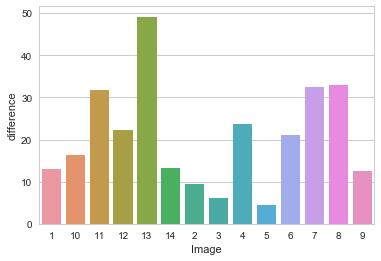

In [1574]:
balanceplot(balance_before)
# We actually see that a few datasets are highly imbalanced. I chose a treshold of 15% to resample the minority class.

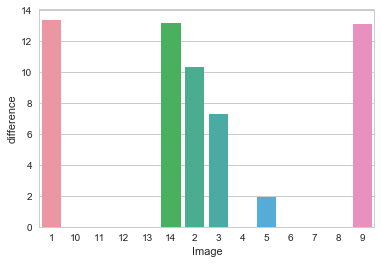

In [1578]:
balanceplot(balance_after)
#these are the results after working away the highly imbalanced datasets. Only image 1,14,2,3,5 & 9 are still imbalanced.

In [1342]:
#We cut off arbitrarely at 15%
#Here we extract all image codes that contain a difference higher than 15% and store it in unbalanced datasets
#We use these image codes for preprocessing in the "mother of loops"
unbalanced_datasets = list(balance_before[balance_before.difference > 15].Image.values)

In [ ]:
print('Image + 1 Class Imbalance (before)' +'\n', balance_before.iloc[:,-1])
print(' ')
print('-------')
print(' ')
print('Image + 1 Class Imbalance (after)'+'\n',balance_after.iloc[:,-1])

In [ ]:
balance.to_csv('/Users/decio/thesis/csi_thesis/data/processed/class_balance_image.csv')

In [2130]:
fixation.head()

,Image,Scene,ROI,Participant,FixDur,FixNr,Start,End,X,Y,Name,ExitEntry,Movable,Evidence,NextROI
0,1,1,0,2.0,103.0,1.0,7.0,109.0,510.9,381.0,Elsewhere,No,No,No,Bottle_on_table
1,1,1,22,2.0,77.0,2.0,236.0,312.0,450.8,307.0,Bottle_on_table,No,Yes,Yes,Floor
2,1,1,9,2.0,300.0,3.0,347.0,646.0,414.5,447.9,Floor,No,No,No,Body
3,1,1,8,2.0,165.0,4.0,687.0,851.0,468.6,619.1,Body,No,Yes,Yes,Elsewhere
4,1,1,0,2.0,461.0,5.0,876.0,1336.0,465.4,687.9,Elsewhere,No,No,No,Elsewhere


## Understanding features

## write something down about multicolinearity.

for i in image_dict.keys():
    print('dataset',i)
    image_dict[i].corr()
    sns.heatmap(var, xticklabels = var.columns, yticklabels = var.columns, annot = True)
    plt.savefig('./reports/figures/Corrplot_dataset' + str(i)+'.png')
    plt.show()

In [2133]:
image_dict[1].head()

,ROI,FixDur,Pixel,Group,Image
1,0,138,76.350311,2,1
2,8,517,141.018758,2,1
3,7,303,117.455694,2,1
4,8,248,50.642275,2,1
5,0,158,166.012048,2,1


In [1663]:
# 2 Feature selection with PCA
from sklearn.decomposition import PCA

In [1679]:
image_dict[1].Group.astype('')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 1 to 9892
Data columns (total 5 columns):
ROI       1270 non-null int64
FixDur    1270 non-null int64
Pixel     1270 non-null float64
Group     1270 non-null object
Image     1270 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 59.5+ KB


In [1700]:
image_dict[1]
image_dict[1].Group = image_dict[1].Group.replace(['CSI', 'Novice'], [1,2])

In [1701]:
array = image_dict[1].values

In [1702]:
X = array[:,0:3]
y = array[:, 4]

In [2031]:
b = [1,2,3,4,5,6,7]

In [2032]:
b[:3]

[1, 2, 3]

In [2033]:
b[3:]

[4, 5, 6, 7]

In [1732]:
z.dtype

dtype('float64')

In [1718]:
pca = PCA(n_components = 2)

fit = pca.fit(X)

In [1719]:
fit.explained_variance_ratio_

array([0.7747865 , 0.22443402])

In [1727]:
print('explained variance: {}'.format(fit.explained_variance_ratio_))
print(fit.components_)

explained variance: [0.7747865  0.22443402]
[[ 3.37072562e-03  9.99993971e-01  8.34139559e-04]
 [-4.16427866e-03 -8.20100349e-04  9.99990993e-01]]


In [1839]:
# ExtraTreesClassifier on the whole thing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


def fitsome(df):
    """Takes dictionary object and fits a model"""

    importante = []
    array_values = df.values
    #define numpy arrays train and target values
    X = array_values[:,0:2].astype('int')
    y = array_values[:, 3].astype('int')
    
    tree_model = ExtraTreesClassifier()
    tree_model.fit(X,y)
    importante = tree_model.feature_importances_
    
    return importante


In [1873]:
dict_rf = {}
for i in image_dict.keys():
    image_dict[i].Group = image_dict[i].Group.replace(['CSI', 'Novice'], [1, 2])                          
#    dict_rf[i] = fitsome(image_dict[i])

In [2012]:
for i in image_dict.keys():
    dict_rf[i] = fitsome(image_dict[i])

In [2022]:
image_dict[1].head()

,ROI,FixDur,Pixel,Group,Image
1,0,138,76.350311,2,1
2,8,517,141.018758,2,1
3,7,303,117.455694,2,1
4,8,248,50.642275,2,1
5,0,158,166.012048,2,1


In [2018]:
df = pd.DataFrame.from_dict(dict_rf, orient = 'index').rename(index = str, columns = {0: 'feat1', 1: 'feat2'})

In [2019]:
df.reset_index(inplace = True)

In [2020]:
df

,index,feat1,feat2
0,1,0.168255,0.831745
1,2,0.090134,0.909866
2,3,0.186417,0.813583
3,4,0.086118,0.913882
4,5,0.119099,0.880901
5,6,0.148105,0.851895
6,7,0.180802,0.819198
7,8,0.090978,0.909022
8,9,0.104245,0.895755
9,10,0.121117,0.878883


In [1920]:
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
feat1,0.152591,0.103335,0.177267,0.106092,0.127522,0.14835,0.192055,0.085525,0.109392,0.147009,0.168074,0.077344,0.044332,0.102807
feat2,0.847409,0.896665,0.822733,0.893908,0.872478,0.85165,0.807945,0.914475,0.890608,0.852991,0.831926,0.922656,0.955668,0.897193


In [1935]:
df_feat = pd.DataFrame(df.feat1)
df_feat2 = pd.DataFrame(df.feat2)

In [1937]:
df_feat['feat'] = 'feat1'
df_feat2['feat'] = 'feat2'

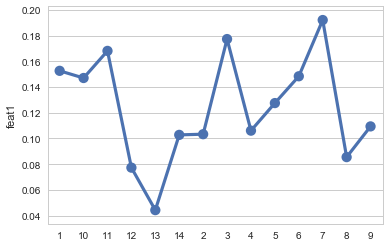

In [1923]:
sns.pointplot(x = df.index, y = df.feat1, data = df)
plt.show()

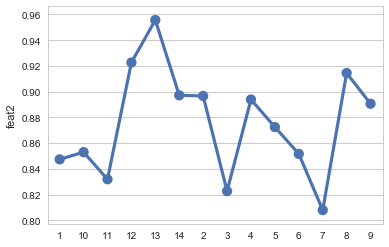

In [1917]:
sns.pointplot(x = df.index, y = df.feat2, data = df)
plt.show()

#Actually it is clear that feature 2 explains the most variance. 
# Our tree classifier kicked out the first variable

In [ ]:
for i in image_dict.keys():
    dictionary_balance2[i] = check_balance(image_dict, i)

In [ ]:
#Build a decisiontree classifier and an SVMxt

In [1781]:
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier

In [1782]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion = 'entropy'))
])

# Parameters for the gridsearch
param_grid = {
    'clf__max_depth':(5,10,15),
    'clf__min_samples_split': (2,3,4),
    'clf__min_samples_leaf' : (1,2,3)
}

In [1784]:
from sklearn.model_selection import GridSearchCV

In [1813]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2018)

In [1814]:
grid_search = GridSearchCV(pipeline, param_grid, verbose = 0, scoring = 'f1')

In [1815]:
grid_search.fit(X_train, y_train)

/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__max_depth': (5, 10, 15), 'clf__min_samples_split': (2, 3, 4), 'clf__min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [2023]:
??grid_search()

In [1809]:
array = image_dict[1].values

In [1810]:
image_dict[1].head()

,ROI,FixDur,Pixel,Group,Image
1,0,138,76.350311,2,1
2,8,517,141.018758,2,1
3,7,303,117.455694,2,1
4,8,248,50.642275,2,1
5,0,158,166.012048,2,1


In [1811]:
x = array[:,0:2].astype('float64')
y = array[:, 3].astype('float64')
    

In [1816]:
pred = grid_search.predict(X_test)

In [1798]:
from sklearn.metrics import classification_report

In [1799]:
best_params = grid_search.best_params_

In [1818]:
grid_search.best_score_

for param_name in sorted(parameters.keys()):
    print(param_name, best_params[param_name])

clf__max_depth 5
clf__min_samples_leaf 1
clf__min_samples_split 2


In [1819]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.42      0.43      0.42       155
         2.0       0.60      0.60      0.60       226

   micro avg       0.53      0.53      0.53       381
   macro avg       0.51      0.51      0.51       381
weighted avg       0.53      0.53      0.53       381



In [1774]:
print(tree_model.feature_importances_)

[0. 0. 0.]


In [1773]:
tree_model = ExtraTreesClassifier(n_estimators = 3)
tree_model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1743]:
image_dict[1].values

array([[  0.        , 138.        ,  76.35031107,   2.        ,
          1.        ],
       [  8.        , 517.        , 141.01875762,   2.        ,
          1.        ],
       [  7.        , 303.        , 117.45569377,   2.        ,
          1.        ],
       ...,
       [  0.        , 216.        ,  77.02759246,   1.        ,
          1.        ],
       [  0.        , 152.        , 161.66944671,   1.        ,
          1.        ],
       [  0.        , 266.        , 186.63892949,   1.        ,
          1.        ]])

## Modules

In [1556]:
def create_dict(df, col):
    """takes a dataframe with a Participant column
    and splits it into a dictionary object containing a dataframe per participant
    in order for this to work the df columns has to have a participant column"""
    
    columns = list(df[col].unique()) 
    
    dict_df = {}
    for x in columns:
        dict_df[x] = df[df[col] == x]
    return(dict_df)

def dict_to_df(x, colname):
    x = pd.Series(x).to_frame()
    x = x.rename(index = str, columns = {0: colname})
    x = x.reset_index()
    x = x.rename(index = str, columns = {'index': 'Participant'})
    x.loc[:,'Participant'] = x.loc[:,'Participant'].astype(int)
    return x

def return_perc(x):
    perc = x[x.Evidence == 'Yes']['FixDur'] / x.FixDur.sum() * 100
    return float(perc)


def numbers_pp(df, col):
    """takes a dataframe and the name of a column with discrete variables and returns
    a dictionary with key value pairs being participant and a value of interest 
    
    df = df with columns
    col = column of interest (Note that this column should be included in df with columns).
    """
    perc_yes = {}
    
    value = create_dict(df)
    
    for k in value.keys():
        value[k].loc[:,col] = value[k].loc[:,col].astype(str)
        value[k] = value[k].drop(['Participant'], axis = 1)
        
        perc_yes[k] = return_perc2(pd.DataFrame(value[k].groupby([col]).sum()).reset_index(), col)
    return perc_yes

def return_perc2(x, col):
    perc = x[x[col] == 'Yes'].loc[:,'FixDur'] / x.FixDur.sum() * 100
    return float(perc)

def get_unique (df, col):
    new_df = {}
    
    dict_of_df = create_dict(df)
    
    for i in dict_of_df.keys():
        #dict_of_df[i] = dict_of_df[i].drop(['Participant'], axis = 1)
        new_df[i] = len(list(dict_of_df[i][col].unique())) 
        
    return new_df


def deal_with_imbalance(df,k):

    #df.Group = df.Group.map(dict(Novice = int(1), CSI = int(2))) #turn classes into 0 and 1 
    
    #Here we chose a knn strategy with k=3 in order to resample the minority class.
    smote = SMOTE(sampling_strategy = 'auto', k_neighbors = 3 ,random_state = 2018)
    X, y = smote.fit_resample(np.array(df.iloc[:,0:3]), np.array(df.Group)) # resample classes with a KNN

    #MAKE COLUMNS
    cols = ['ROI', 'FixDur', 'Pixel']
    cols2 = ['Group']

    #Concatenate the arrays into a new dataframe
    df = pd.concat([pd.DataFrame(X, columns = cols), pd.DataFrame(y, columns = cols2)],axis = 1  )
    df['Image'] = k
    df[['ROI','FixDur']] = df[['ROI','FixDur']].astype('int32') #= int(df['ROI'])
    
    
    return df

In [ ]:
#Dont throw away yet ---- 

In [1557]:
image_dict[13].iloc[:,0:3].head()

,ROI,FixDur,Pixel
536,6,439,32.703517
537,3,174,120.283706
1113,6,260,154.082640
1114,6,579,24.752374
1116,0,373,8.556284


In [1550]:
test = image_dict[6]

In [1555]:
image_dict[6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 234 to 10119
Data columns (total 5 columns):
ROI       667 non-null int64
FixDur    667 non-null int64
Pixel     667 non-null float64
Group     667 non-null object
Image     667 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 31.3+ KB


In [1530]:
fixation = fixation[['Image', 'ROI','FixDur', 'X', 'Y', 'Group']]
image_dict = create_dict(fixation, 'Image') # here we split the dataframe by imagenumber

In [1531]:
for k in image_dict.keys():    
    image_dict[k] = pd.concat([image_dict[k], image_dict[k][['X','Y']].diff()], axis = 1)  # concatenate df with subset of df that contain row-wise differences for X and Y 
    image_dict[k]['Pixel'] = np.sqrt(np.square(image_dict[k].iloc[:, -1]) + np.square(image_dict[k].iloc[:, -2])) # Make new column with pixels 
    image_dict[k] = image_dict[k].drop(['X', 'Y'], axis = 1)
    image_dict[k] = image_dict[k][np.abs(stats.zscore(image_dict[k].FixDur)) < 2] # here we only keep the fixation durations that are within twice the standard deviation
    image_dict[k]['Group'] = image_dict[k].pop('Group')
    image_dict[k] = image_dict[k].dropna()
    image_dict[k] = image_dict[k][np.abs(stats.zscore(image_dict[k].Pixel)) <2] # Same for pixel coordinates.
    image_dict[k]['Image'] = image_dict[k].pop('Image') # so every DF looks the same
   # if k in unbalanced_datasets:
     #   image_dict[k] = deal_with_imbalance(image_dict[k], k)
   # if 1 in image_dict[k].Group:
    #    image_dict[k].Group = image_dict[k].Group.replace([1, 2], ['CSI', 'Novice']) # Change Group back to CSI NOVICE for uniformity

In [ ]:
# we drop the participant label in order to pivot later
perc_evidence = {}

for k in evidence.keys():
    evidence[k].Evidence = evidence[k].Evidence.astype(str) # set centrally on fixation.
    evidence[k] = evidence[k].drop(['Participant'], axis = 1)
    perc_evidence[k] = return_perc(pd.DataFrame(evidence[k].groupby(['Evidence']).sum()).reset_index())